In [96]:
from collections import deque
from sklearn.cluster import KMeans
import numpy as np
import csv
#csv는 엑셀과 달리 , 를 통해 데이터를 구분
# To plot pretty figures
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
    

def distance(x,y):
    dist = np.linalg.norm(np.array(x)- np.array(y))
    return dist 
# np.linalg.norm -> L2 norm 벡터 p,q의 직선 거리 
# (x^2 + y^2)^(1/2)


#given cities
cities = []
#solution
path= []

with open('TSP.csv', mode = 'r', newline='') as tsp:
    #마찬가지로 읽기 방식으로 TSP.csv를 가져온다 -> 0행에는 x좌표 1행에는 y 좌표가 들어 있음
    
    #read TSP city map
    reader = csv.reader(tsp)
    for row in reader: # -> 가로 축으로 읽으므로 각 열 별로[x,y] 형태로 들어가게 된다
        cities.append(row)

cities =np_cities = np.array(cities).astype('float64')



def cen_greedy_path(target_cluster, start_node_num, path):
    
    for i in range(0,len(target_cluster)):
        
        if len(path)==0: #처음 집어 넣는 거
            path.append(start_node_num)
        else:
            current_node_num = path.pop() #제일 마지막에 넣은거 꺼내서 current_node_num 에 저장
            #print(current_node_num)
            path.append(current_node_num) #path 는 그대로 있어야지
    
            min_distance = 10000 #아무리 멀어도 10000보다는 작음
    
             #current node는 가장 최근에 넣은 node
            for node_num in range(0,len(target_cluster)): # 0~ 클러스터 개수 - 1 까지 
                if (current_node_num == node_num): #자기 자신은 예외처리
                    pass
                else:
                    if node_num in path:
                        pass
                    else:
                        if(min_distance >= distance(target_cluster[current_node_num],target_cluster[node_num])):
                            next_node_num = node_num
                            min_distance = distance(target_cluster[current_node_num],target_cluster[node_num])
                            #print(min_distance)
                        else:
                            pass
        
            path.append(next_node_num) #갱신
       
    
    
    return path


#overloading
def greedy_path(target_cluster, start_node_num, path,target_cluster_idx):
  
    next_node_num = 777777777777 #이거 들어가면 오류뜨게 하려고
    
    for i in  target_cluster_idx:
        
        if len(path)==0: #처음 집어 넣는 거
            path.append(start_node_num)
        else:
            current_node_num = path.pop() #제일 마지막에 넣은거 꺼내서 current_node_num 에 저장
            #print(current_node_num)
            path.append(current_node_num) #path 는 그대로 있어야지
            
            min_distance = 10000 #아무리 멀어도 10000보다는 작음
            
             #current node는 가장 최근에 넣은 node
            for node_num in target_cluster_idx: # 0~ 클러스터 개수 - 1 까지 
                if (current_node_num == node_num): #자기 자신은 예외처리
                    pass
                else:
                    if node_num in path:
                        pass
                    else:
                        if(min_distance >= distance(target_cluster[current_node_num],target_cluster[node_num])):
                            next_node_num = node_num
                            min_distance = distance(target_cluster[current_node_num],target_cluster[node_num])
                            #print(min_distance)
                        else:
                            pass
            
            path.append(next_node_num) #갱신
       
    
    
    return path


def cal_cost(my_path):
    dist = 0
    for idx in range (0,len(my_path)):
        if (idx == len(my_path)-1):
            pass #path의 맨끝에는 생략
        else:
            dist = dist + distance(np_cities[my_path[idx]],np_cities[my_path[idx+1]])
    dist = dist + distance(np_cities[my_path[0]],np_cities[my_path[len(my_path)-1]]) #마지막 돌아오는거 추가
    return dist


In [97]:
colors = ["black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" ,"black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan", "darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate","darkorange","tan","darkgoldenrod","gold","olive","yellow","yellowgreen","darkseagreen","lightgreen","forestgreen", "springgreen","aqua", "deepskyblue","navy", "blue", "slateblue","rebeccapurple" , "black", "silver","rosybrown","brown","red","chocolate"]
print(len(colors))

190


In [20]:
# 전에 구한 최적의 cluster 개수를 통해 군집화 진행
k=best_k=25
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(cities)

In [98]:


x_cen =[]
y_cen=[]
for i in range (0,k):
    x_cen.append(kmeans.cluster_centers_[i][0])
    y_cen.append(kmeans.cluster_centers_[i][1])

    
    
    
index_cluster_ele = []
for idx in range (0,k): #초기화 &방을 만듬
        index_cluster_ele.append([])
for idx in range (0,1000):
        index_cluster_ele[y_pred[idx]].append(int(idx))

       
    

NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)
temp_cen_dis = []
cen_dis = 0
temp=100
i=0
for j in range(0,NUMBER_OF_CLUSTER):
    if i==j: #예외처리
        pass
    else:
        if(temp >= distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])):
            index_min_distance = j
            temp = distance(kmeans.cluster_centers_[i],kmeans.cluster_centers_[j])
            temp_cen_dis.append(j)
        else:
              pass
cen_dis = (max(temp_cen_dis))






center_path = deque([])
target_cluster = kmeans.cluster_centers_ #이따가 클러스터 내부도 하기 위해서 center들 모임도 cluster 취급
start_node_num = cen_dis
cen_path = cen_greedy_path(target_cluster,start_node_num,center_path)

#중심들의 경로 cen_path


target_cluster = np_cities
path =[]
count = 0


for number_of_cluster in cen_path: #0~ 까지 위의 루트대로    
    temp_pos = [i for i, x in enumerate(y_pred) if x == number_of_cluster] #각 cluster의 index 가 저장돤다


    start_node_num = temp_pos[0] #클러스터 내부의 시작점   -->유전 알고리즘으로 해결해보자(시작점을 바꾸면서)
    cluster_number = number_of_cluster
    start_node = kmeans.cluster_centers_[cluster_number] #오차가 무시할 정도

    path = greedy_path(target_cluster, start_node_num, path,temp_pos)

In [99]:
cal_cost(cen_path)

1184.1447884374836

cost :  1184.1447884374836


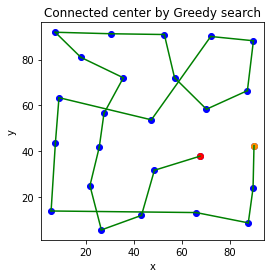

In [100]:
target_cluster = cen_path
print("cost : ",cal_cost(cen_path))
plt.figure(figsize=(4, 4)) #그래프의 크기조절
plt.scatter(x_cen,y_cen,c='b',alpha= 1) # cluster의 center를 빨강으로 표시

plt.scatter(x_cen[target_cluster[0]],y_cen[target_cluster[0]],c='r',alpha= 1)

plt.scatter(x_cen[target_cluster[len(target_cluster)-1]],y_cen[target_cluster[len(target_cluster)-1]],c='darkorange',alpha= 1)

plt.title("Connected center by Greedy search")
plt.xlabel("x")
plt.ylabel("y")

x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(kmeans.cluster_centers_[target_cluster[i]][0]))
    y.append(float(kmeans.cluster_centers_[target_cluster[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

    

plt.show()  #-> 그래프를 출력

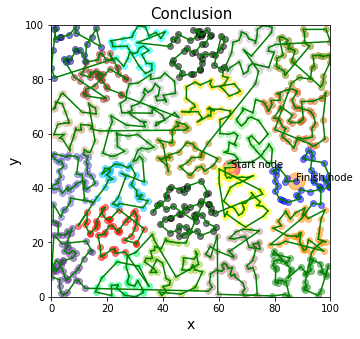

In [24]:
target_cluster = np_cities

plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("Conclusion", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

plt.scatter(target_cluster[path[0]][0],target_cluster[path[0]][1],c='r',alpha= 0.5,s=300)
plt.text(target_cluster[path[0]][0],target_cluster[path[0]][1], 'Start node')

plt.scatter(target_cluster[path[len(np_cities)-1]][0],target_cluster[path[len(np_cities)-1]][1],c='darkorange',alpha= 0.5,s=300)
plt.text(target_cluster[path[len(np_cities)-1]][0],target_cluster[path[len(np_cities)-1]][1], 'Finish node')

for cluster_index in range (0,k):
    for m in index_cluster_ele[cluster_index]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c=colors[cluster_index])
        
        
x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(target_cluster[path[i]][0]))
    y.append(float(target_cluster[path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

plt.show()
#c = 'b,g,r,c,y,m,k,w'  -> color

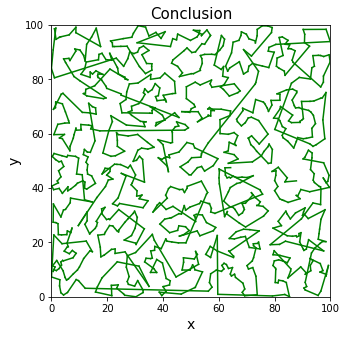

In [101]:
target_cluster = np_cities

plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("Conclusion", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정


        
        
x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(target_cluster[path[i]][0]))
    y.append(float(target_cluster[path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

plt.show()
#c = 'b,g,r,c,y,m,k,w'  -> color

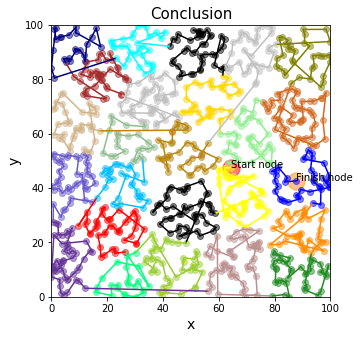

In [25]:
target_cluster = np_cities


len_of_cluster = []


for i in range (0,k):
    idx = cen_path[i]
    lenth = (len(index_cluster_ele[idx]))
    len_of_cluster.append(lenth)


start_node_index = [0]
finish_node_index = []
temp = -1

for i in range (0,k):
    temp = temp+len_of_cluster[i]
    finish_node_index.append(temp)

for i in range (0,k-1):
    start_node_index.append(finish_node_index[i]+1)








plt.figure(figsize=(5, 5)) #그래프의 크기조절
plt.title("Conclusion", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정
plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정


plt.scatter(target_cluster[path[0]][0],target_cluster[path[0]][1],c='r',alpha= 0.5,s=300)
plt.text(target_cluster[path[0]][0],target_cluster[path[0]][1], 'Start node')
plt.scatter(target_cluster[path[len(target_cluster)-1]][0],target_cluster[path[len(target_cluster)-1]][1],c='darkorange',alpha= 0.5,s=300)
plt.text(target_cluster[path[len(target_cluster)-1]][0],target_cluster[path[len(target_cluster)-1]][1], 'Finish node')



index_cluster_ele = []
for n in range (0,k):
    index_cluster_ele.append([])
for idx in range (0,1000):
        index_cluster_ele[y_pred[idx]].append(int(idx))
        
        
        
cluster_color = []
for cluster_index in center_path:
    for m in index_cluster_ele[cluster_index]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c=colors[cluster_index])
        cluster_color.append(colors[cluster_index]) #무슨 색깔을 썼는지 저장




x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(target_cluster[path[i]][0]))
    y.append(float(target_cluster[path[i]][1]))
    
    
# x : path 경로의 x 좌표 모음 
# y : path 경로의 y 좌표 모음 

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)    i는 0~ 999 로 증가
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c= cluster_color[i])
        

plt.show()


In [26]:
cal_cost(path)

3050.2307976388624

In [56]:
def swap(path,x,y):
    temp = 0
    temp =path[x]
    path[x] = path[y]
    path[y] = temp
    return path


    
def cross_over (slice_point, p1, p2):
    p1_front =[]
    p1_back =[]
    p2_front =[]
    p2_back =[]

    for i in range (0,slice_point):
        p1_front.append(p1[i])
        p2_front.append(p2[i])
               
    for i in range (slice_point,25):    
        p1_back.append(p1[i])
        p2_back.append(p2[i])
    
    
    
    for i in range (0, len(p2_back)):
        p1_front.append(p2_back[i])
        p2_front.append(p1_back[i])
    return p1_front, p2_front



def mutation (best_path,c1):
    length = len(c1)
    check =  best_path
    
    my_list = c1
    new_list = []
    for v in my_list:
        if v not in new_list:
            new_list.append(v)
            
            
    for i in range(0,len(check)):
        if(check[i] not in new_list):
            new_list.append(check[i])
    
    

    return new_list  


def cal_cost_path(c_path):    

    target_cluster = np_cities
    path =[]
    count = 0
    
    for number_of_cluster in c_path: #0~ 까지 위의 루트대로    
        temp_pos = [i for i, x in enumerate(y_pred) if x == number_of_cluster] #각 cluster의 index 가 저장돤다
        start_node = kmeans.cluster_centers_[number_of_cluster] #오차가 무시할 정도

        start_node_num = temp_pos[0] #클러스터 내부의 시작점   -->유전 알고리즘으로 해결해보자(시작점을 바꾸면서)
        path = greedy_path(target_cluster, start_node_num, path,temp_pos)   
    return cal_cost(path)


In [57]:
x_cen =[]
y_cen=[]

for i in range (0,len( kmeans.cluster_centers_)):
    x_cen.append(kmeans.cluster_centers_[i][0])
    y_cen.append(kmeans.cluster_centers_[i][1])
   
     
    
target_cluster = kmeans.cluster_centers_ #이따가 클러스터 내부도 하기 위해서 center들 모임도 cluster 취급
cen_path_25 = []
for repeat in range (0,NUMBER_OF_CLUSTER):
    center_path = deque([])
    start_node_num = repeat
    cen_path = cen_greedy_path(target_cluster,start_node_num,center_path)
    cen_path_25.append(cen_path)   


for a in range (0,24):   
    for b in range (a+1,25):
        if (cal_cost_path(cen_path_25[a]) > cal_cost_path(cen_path_25[b])):
            cen_path=swap(cen_path_25,a,b)         
            
for i in range (0,25):  
    print(cen_path,cal_cost_path(cen_path_25[i]))          

2999.079283412553
3010.3429643591326
3015.02555214426
3027.632677885863
3028.000310439755
3028.902111397469
3039.8108785425648
3040.9861379115623
3045.2916879781997
3045.3309552514297
3049.217934675321
3050.2307976388624
3057.9520564806094
3061.3097497089284
3063.026485565576
3068.2186653760295
3070.143534831741
3084.2899842632846
3099.073898540505
3099.4508612645836
3100.7994160360527
3122.7546643320247
3130.173618063223
3138.5547538254186
3149.3300207961006


In [58]:
index_cluster_ele = []
for idx in range (0,k): #초기화 &방을 만듬
        index_cluster_ele.append([])
for idx in range (0,1000):
        index_cluster_ele[y_pred[idx]].append(int(idx))


NUMBER_OF_CLUSTER = len(kmeans.cluster_centers_)



conclusion_of_ga = []
conclusion_of_ga.append(list((cen_path_25)[0]))
conclusion_of_ga.append(list((cen_path_25)[1]))
conclusion_of_ga.append(list((cen_path_25)[2]))

c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
c6=[]
p1 = list(cen_path_25)[0]
p2 = list(cen_path_25)[2]
p3 = list(cen_path_25)[1]
c1,c2 = cross_over(1, p1, p2)
c3,c4 = cross_over(1, p1, p3)
c5,c6 = cross_over(1, p2, p3)
c1 = mutation (conclusion_of_ga[0],c1)
c2 = mutation (conclusion_of_ga[0],c2) 
c3 = mutation (conclusion_of_ga[0],c3)
c4 = mutation (conclusion_of_ga[0],c4)
c5 = mutation (conclusion_of_ga[0],c5)
c6 = mutation (conclusion_of_ga[0],c6)
conclusion_of_ga.append(c1)
conclusion_of_ga.append(c2)
conclusion_of_ga.append(c3)
conclusion_of_ga.append(c4)
conclusion_of_ga.append(c5)
conclusion_of_ga.append(c6)

for slice_point in range (2,25):
    c1,c2 = cross_over(slice_point, p1, p2)
    c3,c4 = cross_over(slice_point, p1, p3)
    c5,c6 = cross_over(slice_point, p2, p3)
    c1 = mutation (conclusion_of_ga[0],c1)
    c2 = mutation (conclusion_of_ga[0],c2)  
    c3 = mutation (conclusion_of_ga[0],c3)
    c4 = mutation (conclusion_of_ga[0],c4)
    c5 = mutation (conclusion_of_ga[0],c5)
    c6 = mutation (conclusion_of_ga[0],c6)
    conclusion_of_ga.append(c1)
    conclusion_of_ga.append(c2)
    conclusion_of_ga.append(c3)
    conclusion_of_ga.append(c4)
    conclusion_of_ga.append(c5)
    conclusion_of_ga.append(c6)
    

In [67]:
my_list = conclusion_of_ga
new_list = []
for v in my_list:
    if v not in new_list:
        new_list.append(v)
print(len(new_list))

for a in range (0,len(new_list)):  
    if a== 0:
        min_ga = cal_cost_path(conclusion_of_ga[a])
        min_ga_idx = 0
    else:
        if(cal_cost_path(conclusion_of_ga[a]) < min_ga):
            min_ga =cal_cost_path(conclusion_of_ga[a])
            min_ga_idx = a

86


In [71]:
print("min_ga_idx : ",min_ga_idx,"min_ga : ",min_ga)

min_ga_idx :  0 min_ga :  2987.022521099888


In [84]:
cen_path =  new_list[min_ga_idx]

In [92]:
cal_cost(cen_path)

1161.8303430607502

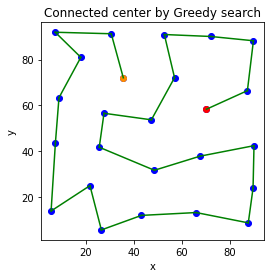

In [83]:
target_cluster = conclusion_of_ga[min_ga_idx]

plt.figure(figsize=(4, 4)) #그래프의 크기조절
plt.scatter(x_cen,y_cen,c='b',alpha= 1) # cluster의 center를 빨강으로 표시

plt.scatter(x_cen[target_cluster[0]],y_cen[target_cluster[0]],c='r',alpha= 1)

plt.scatter(x_cen[target_cluster[len(target_cluster)-1]],y_cen[target_cluster[len(target_cluster)-1]],c='darkorange',alpha= 1)

plt.title("Connected center by Greedy search")
plt.xlabel("x")
plt.ylabel("y")

x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(kmeans.cluster_centers_[target_cluster[i]][0]))
    y.append(float(kmeans.cluster_centers_[target_cluster[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

    

plt.show()  #-> 그래프를 출력

In [85]:
target_cluster = np_cities
path =[]
count = 0


for number_of_cluster in cen_path: #0~ 까지 위의 루트대로    
    temp_pos = [i for i, x in enumerate(y_pred) if x == number_of_cluster] #각 cluster의 index 가 저장돤다


    start_node_num = temp_pos[0] #클러스터 내부의 시작점   -->유전 알고리즘으로 해결해보자(시작점을 바꾸면서)
    cluster_number = number_of_cluster
    start_node = kmeans.cluster_centers_[cluster_number] #오차가 무시할 정도

    path = greedy_path(target_cluster, start_node_num, path,temp_pos)

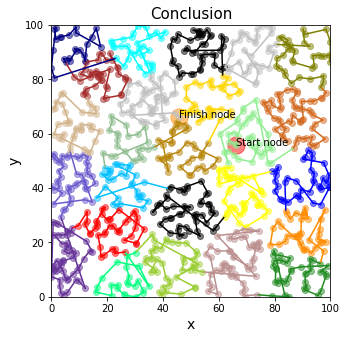

In [91]:
target_cluster = np_cities



plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("Conclusion", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정

plt.scatter(target_cluster[path[0]][0],target_cluster[path[0]][1],c='r',alpha= 0.5,s=300)
plt.text(target_cluster[path[0]][0],target_cluster[path[0]][1], 'Start node')
plt.scatter(target_cluster[path[len(np_cities)-1]][0],target_cluster[path[len(np_cities)-1]][1],c='darkorange',alpha= 0.5,s=300)
plt.text(target_cluster[path[len(np_cities)-1]][0],target_cluster[path[len(np_cities)-1]][1], 'Finish node')

 
        
cluster_color = []
for cluster_index in cen_path:
    for m in index_cluster_ele[cluster_index]:
        plt.scatter(float(cities[m][0]),float(cities[m][1]),alpha=0.5, c=colors[cluster_index])
        cluster_color.append(colors[cluster_index]) #무슨 색깔을 썼는지 저장

        
        
x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(target_cluster[path[i]][0]))
    y.append(float(target_cluster[path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c=cluster_color[i])

plt.show()
#c = 'b,g,r,c,y,m,k,w'  -> color

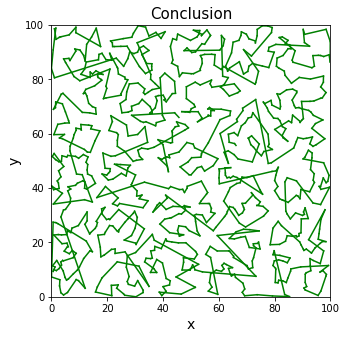

In [95]:
target_cluster = np_cities



plt.figure(figsize=(5, 5)) #그래프의 크기조절

plt.title("Conclusion", fontsize = 15) #그래프의 제목설정
plt.xlabel("x", fontsize=14) #x축 라벨설정
plt.ylabel("y", fontsize=14) #y축 라벨설정

plt.xlim([0,100]) # x축 범위설정
plt.ylim([0,100]) # y축 범위설정
 
        

        
        
x = []
y = []

for i in range (0,len(target_cluster)):
    x.append(float(target_cluster[path[i]][0]))
    y.append(float(target_cluster[path[i]][1]))

for i in range (0,len(target_cluster)-1): #(두개씩묶으므로)
    x_el = [x[i],x[i+1]]
    y_el = [y[i],y[i+1]]
    plt.plot(x_el,y_el,c="g")

plt.show()
#c = 'b,g,r,c,y,m,k,w'  -> color

In [90]:
cal_cost(path)

2987.022521099888